<a href="https://colab.research.google.com/github/mohameddhameem/IBM-Machine-Learning/blob/master/Classification_Final_Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assesment for Final Project - Classification

<B> Problem Statement: </B>

In this assessment, we would like to create a machine learning model that can predict loan default. The author of the dataset has collated it for educational purpose. There are numorus features available in the dataset to correctly identify if a new loan application can go credit default or not.

We will focus on F1 score of the machine learning model.

In [1]:
# Install missing library 
!pip install catboost -q

In [2]:
# import all required libraries
import pandas as pd
import os
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder,\
 MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV,\
 StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score,\
 classification_report, f1_score, precision_score, recall_score

# For classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,\
 GradientBoostingClassifier, AdaBoostClassifier,\
  VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

import matplotlib.pyplot as plt

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

## About Data

The dataset is from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29


The dataset contains the following features:


| Column Name | Variable Name | Description |
| --- | --- | --- |
| laufkont | status | status of the debtor's checking account with the bank (categorical) |
| laufzeit | duration | credit duration in months (quantitative) |
| moral | credit_history | history of compliance with previous or concurrent credit contracts (categorical) |
| verw | purpose | purpose for which the credit is needed (categorical) |
| hoehe | amount | credit amount in DM (quantitative; result of monotonic transformation; actual data and type of transformation unknown) |
| sparkont | savings | debtor's savings (categorical) |
| beszeit | employment_duration | duration of debtor's employment with current employer (ordinal; discretized quantitative) |
| rate | installment_rate | credit installments as a percentage of debtor's disposable income (ordinal; discretized quantitative) |
| famges | personal_status_sex | combined information on sex and marital status; categorical;<br> sex cannot be recovered from the variable, because male singles and female non-singles are coded with the same code (2);<br> female widows cannot be easily classified, because the code table does not list them in any of the female categories |
| buerge | other_debtors | Is there another debtor or a guarantor for the credit? (categorical) |
| wohnzeit | wohnzeit | length of time (in years) the debtor lives in the present residence (ordinal; discretized quantitative) |
| verm | property | the debtor's most valuable property, i.e. the highest possible code is used. Code 2 is used,<br> if codes 3 or 4 are not applicable and there is a car or any other relevant property that does not fall under variable parkont. (ordinal) |
| alter | age | age in years (quantitative) |
| weitkred | other_installment_plans | installment plans from providers other than the credit-giving bank (categorical) |
| wohn | housing | type of housing the debtor lives in (categorical) |
| bishkred | number_credits | number of credits including the current one the debtor has (or had)<br> at this bank (ordinal, discretized quantitative); <br>contrary to Fahrmeir and HamerleÃ¢â‚¬â„¢s (1984) statement, the original data values are not available. |
| beruf | job | quality of debtor's job (ordinal) |
| pers | people_liable | number of persons who financially depend on the debtor (i.e., are entitled to maintenance) (binary, discretized quantitative) |
| telef | telephone | Is there a telephone landline registered on the debtor's name? (binary; remember that the data are from the 1970s) |
| gastarb | foreign_worker | Is the debtor a foreign worker? (binary) |
| kredit | credit_risk | Has the credit contract been complied with (good) or not (bad) ? (binary) => TARGET |

## Download data from repository

https://archive.ics.uci.edu/ml/machine-learning-databases/00573/SouthGermanCredit.zip

In [3]:
# os.chdir('data')
# read csv file seperated by space
data = pd.read_csv('SouthGermanCredit.asc', sep=' ')

In [4]:
# we have read the data headers in german. We have to change the headers to english
col_rename = {'laufkont' : 'status', 'laufzeit': 'duration',
              'moral': 'credit_history', 'verw': 'purpose',
              'hoehe': 'amount', 'sparkont': 'savings',
              'beszeit': 'employment_duration','rate': 'installment_rate',
              'famges': 'personal_status_sex', 'buerge': 'other_debtors',
              'wohnzeit': 'present_residence', 'verm': 'property',
              'alter': 'age', 'weitkred': 'other_installment_plans',
              'wohn': 'housing', 'bishkred': 'number_credits',
              'beruf': 'job', 'pers': 'people_liable',
              'telef': 'telephone', 'gastarb': 'foreign_worker',
              'kredit': 'credit_risk'}

In [5]:
data.rename(columns=col_rename, inplace=True)
# we have changed the headers to english

## Exploratory Data Analysis

In this section we will explore the data and look for patterns in the data to analyze if the given data is a good for machine learning model creation.

1) Describe the data

2) Visualize the data

3) Identify the missing values and fill them

4) Identify the outliers and remove them

5) Identify the categorical variables and encode them (if any)

6) Identify the numerical variables and perform basic statistical analysis

In [6]:
# Lets see the data types of the columns and any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [7]:
# describe the data including object and numeric data
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
status,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_history,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
employment_duration,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
personal_status_sex,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
other_debtors,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


All the data in the dataset is encoded as numeric values. Later in our preprocessing we will encode it to appropriate data types.

In [8]:
# Check if there are any null columns
print("Do we have any missing values ? ", data.isnull().sum().any())

Do we have any missing values ?  False


There is no missing values in the dataset. Good for machine learning model creation. No need of any imputation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab486e33d0>,
      dtype=object)

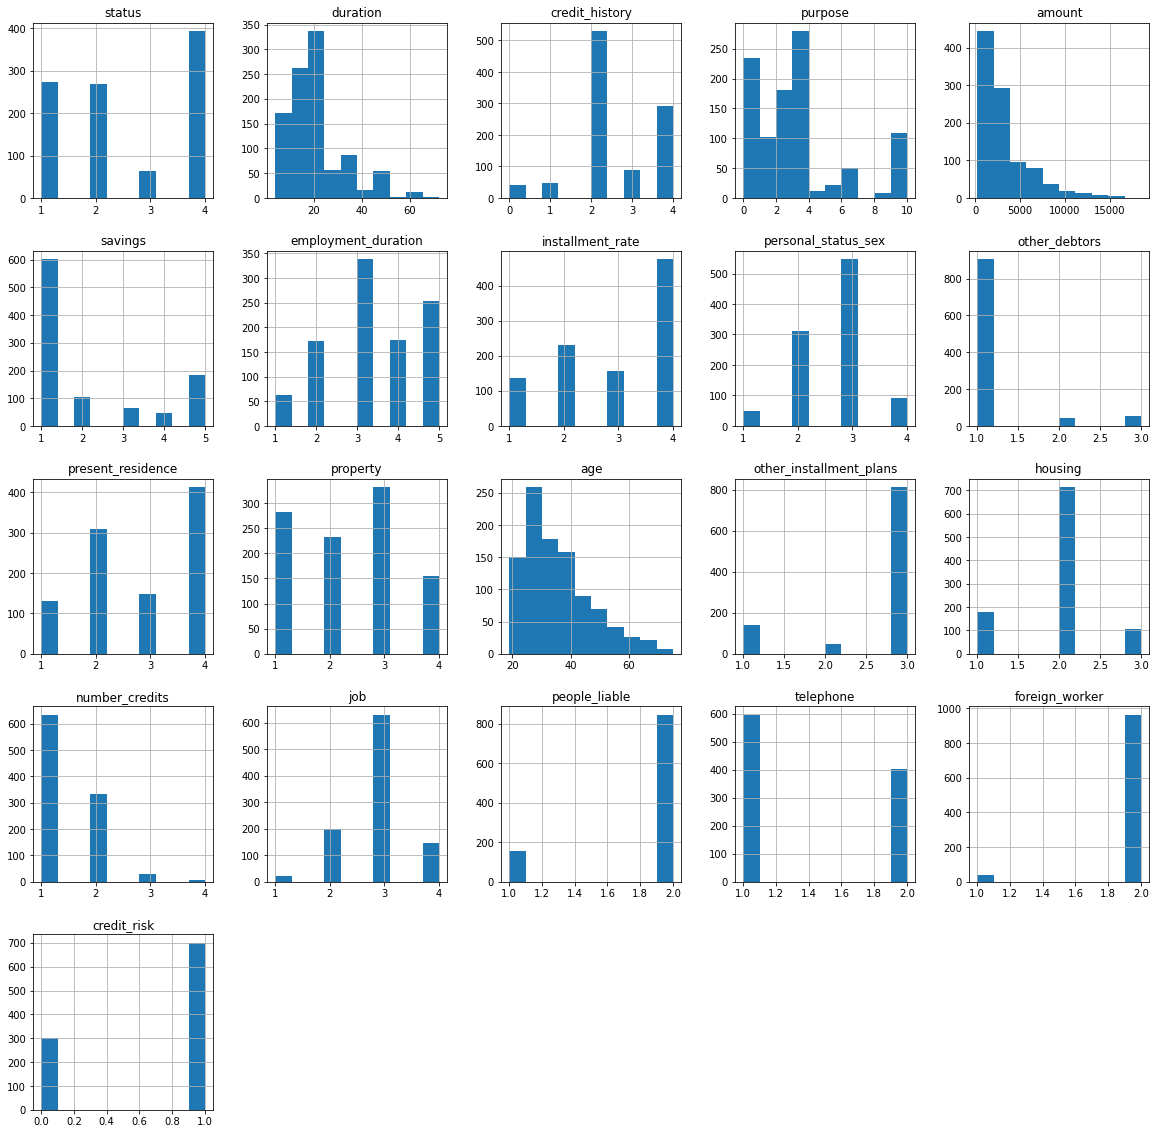

In [9]:
# Visualize the data in a histogram
data.hist(figsize=(20,20))

Before we move further with our analysis, we will change the columns to appropriate data types.

In [10]:
# Lets assign datatypes to the columns
data['status'] = data['status'].astype('category')
data['duration'] = data['duration'].astype('int64')
data['credit_history'] = data['credit_history'].astype('category')
data['purpose'] = data['purpose'].astype('category')
data['amount'] = data['amount'].astype('int64')
data['savings'] = data['savings'].astype('category')
data['employment_duration'] = data['employment_duration'].astype('category') # its an ordinal variable
data['installment_rate'] = data['installment_rate'].astype('float64') # its an ordinal variable
data['personal_status_sex'] = data['personal_status_sex'].astype('category')
data['other_debtors'] = data['other_debtors'].astype('category')
data['other_installment_plans'] = data['other_installment_plans'].astype('category')
data['housing'] = data['housing'].astype('category')
data['people_liable'] = data['people_liable'].astype('category') # its an binary variable
data['telephone'] = data['telephone'].astype('category') # its an binary variable
data['foreign_worker'] = data['foreign_worker'].astype('category') # its an binary variable
data['credit_risk'] = data['credit_risk'].astype('category') # its an binary variable

### Identify outliers in the data

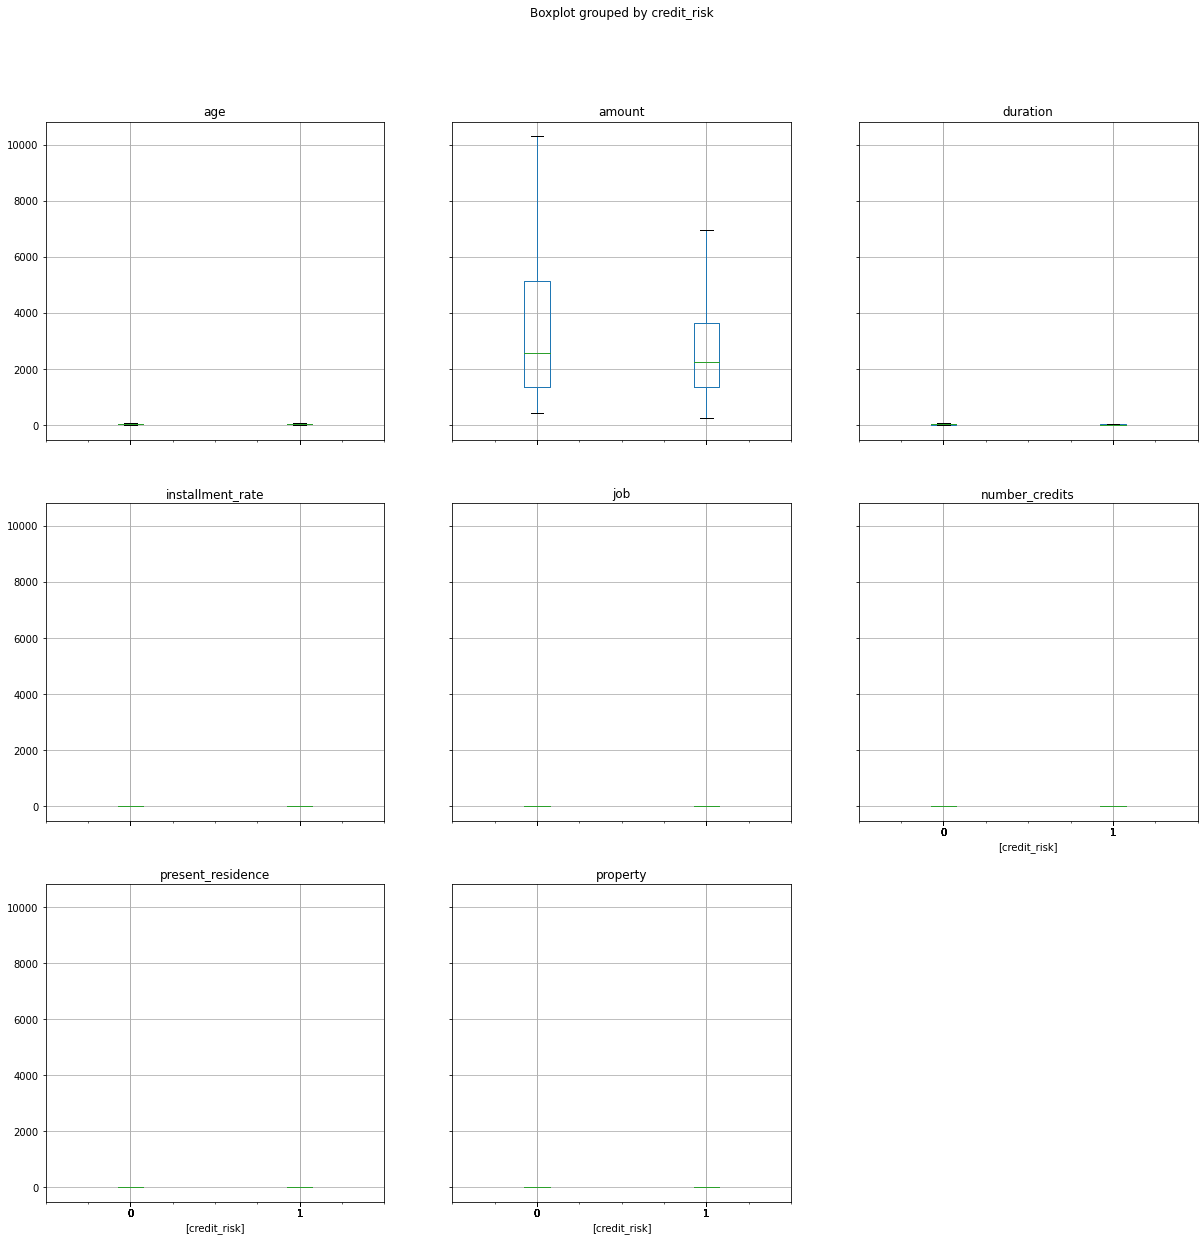

In [11]:
# check outliers
data.boxplot(by="credit_risk", showfliers=False, figsize=(20,20)) # credit_risk is the target variable
plt.show()


### Identify corrleation between variables

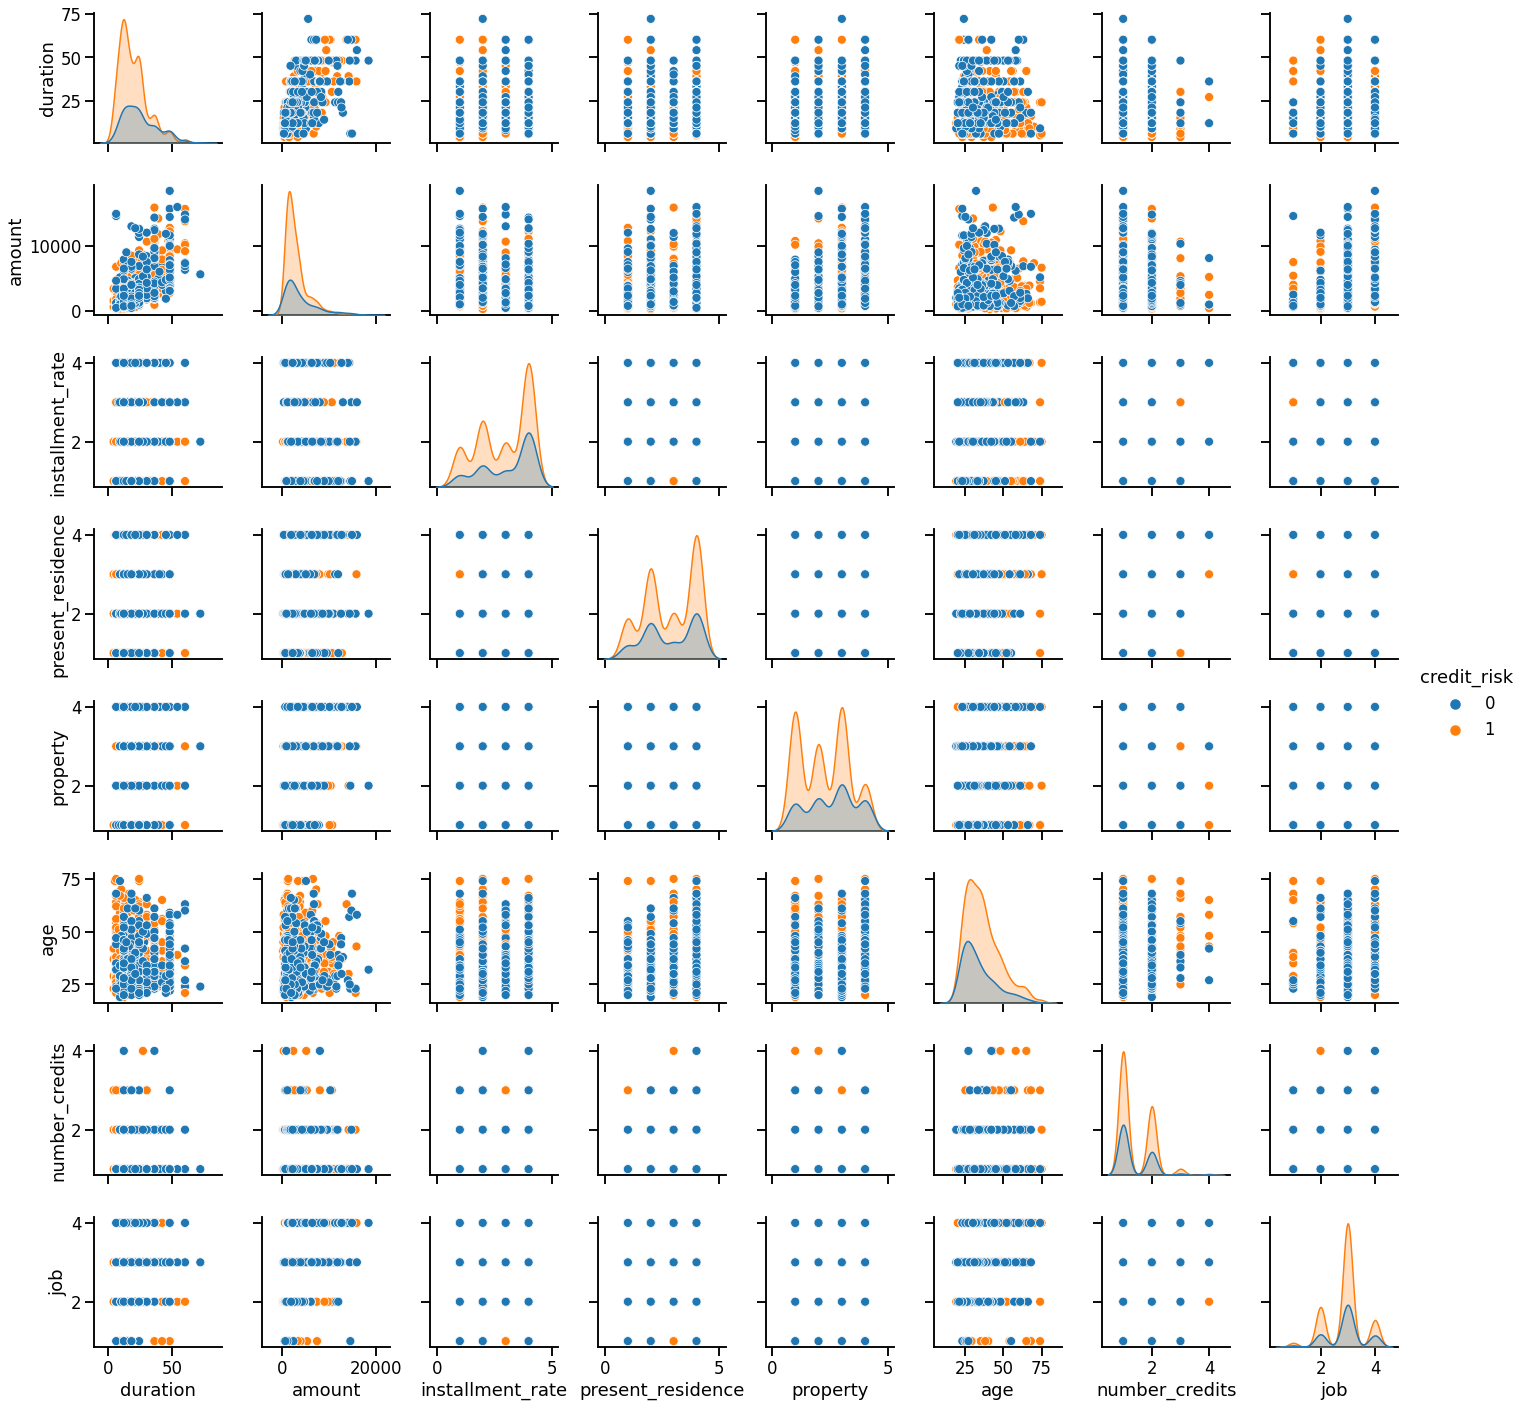

In [12]:
sns.set_context('talk')
sns.pairplot(data, hue='credit_risk')
# plt.show()

List of features: Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker'],
      dtype='object')


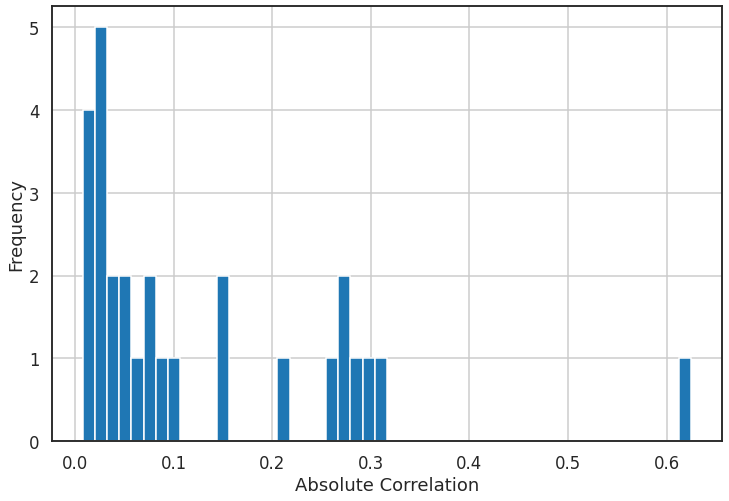

In [13]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = data.columns[:-1]
print('List of features: {}'.format(feature_cols))
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [14]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation


We dont have any correlated features

### Identify skweness in the data

In [15]:
# identify skewness
mask = data.dtypes == np.float64
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

print('Number of skewed columns :', skew_cols.shape[0])
skew_cols

Number of skewed columns : 0


,Skew


### Lets see the distribution of our target variable - Credit Risk

In [16]:
data.credit_risk.value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

### Imbalanced Dataset

As we could see we have 70-30 in our dataset. So in our model building we should use class_weights ( for applicable models) to balance it. We can also try with UpSampling / Downsampling

In [17]:
class_weight_label = {
    1 : 0.7,
    0: 0.3
}

### Findiangs & Actions to be taken on the data

1. We need to normalization the data.
2. We already changed the data to appropriate datatype
3. There are no missing values in the dataset.
4. There are no outliers in the dataset.
5. There is no skewness in the dataset.
6. There is no correlation between the variables.

## Data Preprocessing

Lets segregate the data into categorical , numerical variables , binary variables and ordinal variables.

In [18]:
df_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
status,4
duration,33
credit_history,5
purpose,10
amount,923
savings,5
employment_duration,5
installment_rate,4
personal_status_sex,4


In [19]:
# Lets identify binary variables
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
# Lets identify categorical variables
categorical_variables = list(df_uniques[(10 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
# From the data dictornary we know list of Ordinal variables
ordinal_variables = ['installment_rate', 'present_residence', 'property','number_credits','job']
# Lets find the numerical variables
numerical_variables = list(set(data.columns) - set(binary_variables) - set(categorical_variables) - set(ordinal_variables))
print('Binary variables: {}'.format(binary_variables))
print('Categorical variables: {}'.format(categorical_variables))
print('Numerical variables: {}'.format(numerical_variables))
print('Ordinal variables: {}'.format(ordinal_variables))
# Check if there any common variables between the three categories
print('Common variables between binary, categorical,numerical and ordinal: {}'
.format(set(binary_variables).intersection(set(categorical_variables)
.intersection(set(numerical_variables))).intersection(set(ordinal_variables))))

Binary variables: ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']
Categorical variables: ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job']
Numerical variables: ['amount', 'duration', 'age']
Ordinal variables: ['installment_rate', 'present_residence', 'property', 'number_credits', 'job']
Common variables between binary, categorical,numerical and ordinal: set()


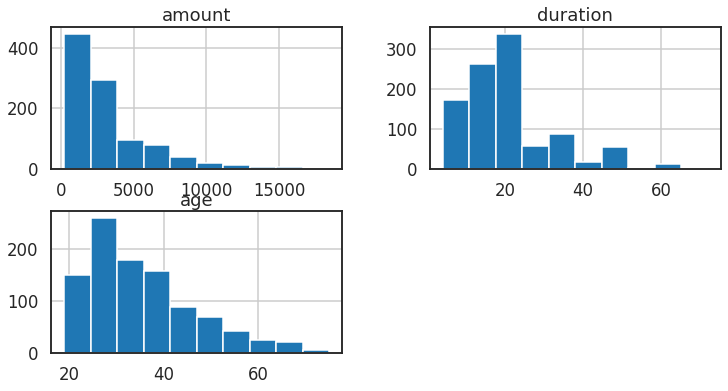

In [20]:
data[numerical_variables].hist(figsize=(12, 6))
plt.show()

## Data Preprocessing

In [21]:
lb, le = LabelBinarizer(), LabelEncoder()
# Encode the ordinal variables
for column in ordinal_variables:
    data[column] = le.fit_transform(data[column])

# Encode the binary variables
for column in binary_variables:
    data[column] = lb.fit_transform(data[column])

categorical_variables = list(set(categorical_variables) - set(ordinal_variables))
data = pd.get_dummies(data, columns = categorical_variables, drop_first=True)

In [22]:
# Lets scale the numerical variables
scaler = MinMaxScaler()
data[numerical_variables] = scaler.fit_transform(data[numerical_variables])

## Train Test Split prepration

In [23]:
X, y = data.drop('credit_risk', axis=1), data['credit_risk']
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Our Data set is 70% positive and 30% negative. Lets validate after splitting
print('Positive samples in training set: {}'.format(y_train.value_counts(normalize=True)[1]))
print('Negative samples in training set: {}'.format(y_train.value_counts(normalize=True)[0]))

print('Positive samples in test set: {}'.format(y_test.value_counts(normalize=True)[1]))
print('Negative samples in test set: {}'.format(y_test.value_counts(normalize=True)[0]))

Positive samples in training set: 0.7028571428571428
Negative samples in training set: 0.29714285714285715
Positive samples in test set: 0.6933333333333334
Negative samples in test set: 0.30666666666666664


With Simple traintest split we have correctly splitted the data 70-30. We dont need to use StratifiedShuffleSplit at this stage.

In [25]:
# utility function to report best scores
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

## Model building

### KNN Classifier

In [26]:
%timeit
# Lets try to identify best K for the KNN Model
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

In [27]:
display(f1_results.sort_values('F1 Score', ascending=False).head())

,K,F1 Score
17,18,0.8426
19,20,0.8397
21,22,0.8390
35,36,0.8388
23,24,0.8372


From the above analysis, K = 18 is the best value for KNN.

In [28]:
%timeit
#Lets create final KNN Model with best K = 18
knn = KNeighborsClassifier(n_neighbors=18, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

### SVM Classifier

In [29]:
%timeit
kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs, class_weight = class_weight_label)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier(class_weight = class_weight_label)
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)

In [30]:
%timeit
# Use nystroem to scale it
X_transformed = nystroem.fit_transform(X_train)
sgd.fit(X_transformed, y_train)
X_test_transformed = nystroem.transform(X_test)
y_pred_svm_scaled = sgd.predict(X_test_transformed)

### Decision Tree Classifier

In [31]:
%timeit
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_test, y_test_pred, 'Decision Tree'),
                                   measure_error(y_test, y_pred_knn, 'KNN'),
                                   measure_error(y_test, y_pred_svm, 'SVM'),
                                   measure_error(y_test, y_pred_svm_scaled, 'SVM Scaled')],
                              axis=1)

In [32]:
%timeit
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42,
                                         class_weight = class_weight_label),
                  param_grid=param_grid,
                  scoring='f1',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)
print(GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth)
y_test_pred_gr = GR.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                   , measure_error(y_test, y_test_pred_gr,
                                                   'Decision Tree Grid Search')],
                                   axis=1)

15 3


### Random Forest Classifier

In [33]:
%timeit
# Ramdom Forest Classifier CV
grid_params = {'n_estimators': [400, 800, 900, 1000],}
RFCV = GridSearchCV(RandomForestClassifier(random_state=42,
                                           class_weight = class_weight_label,
                                           warm_start=True),
                    param_grid=grid_params,
                    scoring='f1',
                    n_jobs=-1)
RFCV = RFCV.fit(X_train, y_train)
print(RFCV.best_estimator_)
y_test_pred_rfcv = RFCV.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                      , measure_error(y_test,
                                                      y_test_pred_rfcv,
                                                      'Random Forest CV')],
                                        axis=1)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, n_estimators=800,
                       random_state=42, warm_start=True)


### Extra Trees Classifier

In [34]:
%timeit
ETCV = GridSearchCV(ExtraTreesClassifier(random_state=42,
                                         class_weight = class_weight_label,
                                         warm_start=True),
                    param_grid=grid_params,
                    scoring='f1',
                    n_jobs=-1)
ETCV = ETCV.fit(X_train, y_train)
print(ETCV.best_estimator_)
y_test_pred_etcv = ETCV.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                        , measure_error(y_test, y_test_pred_etcv, 'Extra Trees CV')],
                                        axis=1)

ExtraTreesClassifier(class_weight={0: 0.3, 1: 0.7}, n_estimators=1000,
                     random_state=42, warm_start=True)


### Gradient Boosting Classifier

In [35]:
%timeit
# The parameters to be fit
param_grid = {'n_estimators': [100, 400, 800, 900, 1000],
              'learning_rate': [0.1, 0.01, 0.001],
              'subsample': [1.0, 0.5],
              'max_features': [2, 3, 4]}
# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42,), 
                      param_grid=param_grid, 
                      scoring='f1',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)
# print the best parameters
print(GV_GBC.best_params_)
y_test_pred_gbc = GV_GBC.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                        , measure_error(y_test, y_test_pred_gbc,
                                                        'Gradient Boosting Classifier')],
                                        axis=1)

{'learning_rate': 0.01, 'max_features': 2, 'n_estimators': 1000, 'subsample': 0.5}


### AdaBoost Classifier

In [36]:
%timeit
# The parameters to be fit
param_grid = {'n_estimators': [ 100, 400, 800, 900, 1000],
              'learning_rate': [0.1, 0.01, 0.001],}
# The grid search object
GV_ABC = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), random_state=42),
                        param_grid=param_grid,
                        scoring='f1',
                        n_jobs=-1)
GV_ABC = GV_ABC.fit(X_train, y_train)
# print the best parameters
print(GV_ABC.best_params_)
y_test_pred_abc = GV_ABC.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                        , measure_error(y_test, y_test_pred_abc, 'AdaBoost Classifier')],
                                        axis=1)

{'learning_rate': 0.01, 'n_estimators': 900}


### Voting Classifier

In [37]:
%timeit
# Lets try to stack the models
# We can stake Decision Tree, KNN,   Random Forest,  on top of each other
estimators = [('knn',knn),('dt',GR), ('rfcv', RFCV), ]
VC = VotingClassifier(estimators, voting='soft')
# this will run for ~10 mins. Be patient
VC = VC.fit(X_train, y_train)
# print the best parameters
#print(VC.estimators_)
y_test_pred_vc = VC.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                        , measure_error(y_test, y_test_pred_vc, 'Voting Classifier')],
                                        axis=1)

### StackingClassifier with Logistic Regression

In [38]:
%timeit
stackingClassifier = StackingClassifier(estimators=estimators,
                                    final_estimator=LogisticRegression(solver='lbfgs', random_state=42))
stackingClassifier = stackingClassifier.fit(X_train, y_train)
y_test_pred_stacking = stackingClassifier.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                        , measure_error(y_test, y_test_pred_stacking, 'Stacking Classifier')],
                                        axis=1)

### XGBoost Classifier

In [39]:
# Lets try with XGBoost Classifier
# The parameters to be fit
param_grid = {
                'n_estimators': [400, 800, 900, 1000],
                'learning_rate': [0.1, 0.01], #, , 0.001 ,0.0001
                #'subsample': [1.0, 0.5],
                'max_features': [1, 2, 3, 4]
              }
# The grid search object
GV_XGB = GridSearchCV(XGBClassifier(random_state=42,
                                    class_weight = class_weight_label,
                                    #tree_method='gpu_hist'
                                    ), # we have enabled GPU
                        param_grid=param_grid,
                        scoring='f1',
                        n_jobs=-1)
GV_XGB = GV_XGB.fit(X_train, y_train)

y_test_pred_xgb = GV_XGB.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                        , measure_error(y_test, y_test_pred_xgb,
                                                        'XGBoost Classifier')],
                                        axis=1)

### CatBoost Classifier

In [40]:
%timeit
# For catboost classifier we dont need to encode the variable. We can send it with the original datatype itself
X, y = data.drop('credit_risk', axis=1), data['credit_risk']
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
# We dont need to preprocess the data for CatBoost classifier
param_grid = {
    'n_estimators': [ 400, 800, 900, 1000],
    'learning_rate': [0.1, 0.01, 0.001]
              }
cat_features = np.where(X.dtypes != float)[0]
CB_CV = GridSearchCV(CatBoostClassifier(random_state=42,
                                        cat_features = cat_features,
                                        class_weights = class_weight_label,
                                        #task_type="GPU",
                                        verbose=False),
                        param_grid=param_grid,
                        scoring='f1',
                        n_jobs=-1)
CB_CV = CB_CV.fit(X_train, y_train)
# print the best parameters
# print(CB_CV.best_params_)
y_test_pred_cb = CB_CV.predict(X_test)
train_test_full_error = pd.concat([train_test_full_error
                                        , measure_error(y_test, y_test_pred_cb,
                                                        'CatBoost Classifier')],
                                        axis=1)

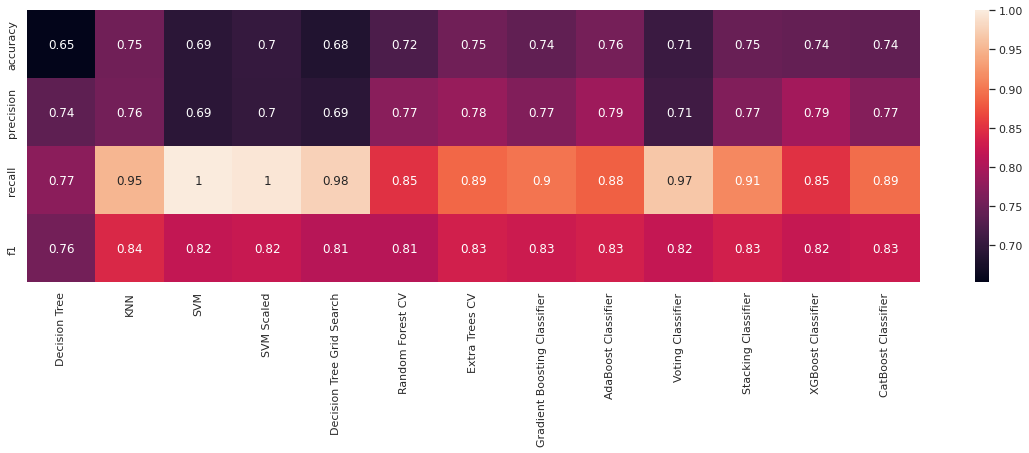

In [45]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
sns.heatmap(train_test_full_error, annot=True)
plt.show()

## Key Findings and Next Action Plan

1. Stacking Classifier works better compared to other individual classifiers. 
2. With the class_weight in place we have decent model to predict the credit default
3. The number of samples (1000) is very less if we want to consider this model for producution deployment. 
4. Its highly recomended to increase the sample size to get more robust model.